### Steps we will follow
-  Data gathering
-  Data cleaning
-  EDA
-  Text Preprocessing
-  Model building
-  Evaluation
-  Improvement

### For End To End Project
-  Git & DVC versioning
-  Model Experimentation using MlFlow
-  Website development
-  Deployment on AWS or Azure

## Data Gathering
- We download two dataset from kaggle
- df1 contain 3016 rows and df2 contain 5572 rows
- Then we combine it for the reason that we have large dataset so the model can learn more efficiently

### Importing Liberaries

In [1]:
import pandas as pd

### Importing Datasets
- First we import the datasets
- Remove Null values in case if they are less in numbers
- Remove Duplicate values
- Giving same heading names for Merging two datasets

In [2]:
df1 = pd.read_csv('spam_or_not_spam.csv')

In [3]:
df1

,Message,Category
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0
...,...,...
3011,abc s good morning america ranks it the NUMBE...,1.0
3012,hyperlink hyperlink hyperlink let mortgage le...,1.0
3013,thank you for shopping with us gifts for all ...,1.0
3014,the famous ebay marketing e course learn to s...,1.0


In [4]:
df2 = pd.read_csv('mail_data.csv')

In [5]:
df2

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


## Data Cleaning

In [6]:
df1.isnull().sum()

Message      1
Category    16
dtype: int64

In [7]:
df1 = df1.dropna()

In [8]:
df1['Category'] = df1['Category'].astype(int)

C:\Users\Suleman Zeb\AppData\Local\Temp\ipykernel_12464\3812507403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category'] = df1['Category'].astype(int)


In [9]:
df1.isnull().sum()

Message     0
Category    0
dtype: int64

In [10]:
df1

,Message,Category
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
3011,abc s good morning america ranks it the NUMBE...,1
3012,hyperlink hyperlink hyperlink let mortgage le...,1
3013,thank you for shopping with us gifts for all ...,1
3014,the famous ebay marketing e course learn to s...,1


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['Category'] = encoder.fit_transform(df2['Category'])

In [12]:
df2

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [13]:
df2.isnull().sum()

Message     0
Category    0
dtype: int64

In [14]:
df = pd.concat([df1,df2], axis=0, ignore_index = False)
df

,Message,Category
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [15]:
df.isnull().sum()

Message     0
Category    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8571 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   8571 non-null   object
 1   Category  8571 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 167.4+ KB


In [17]:
# renaming the cols
df.rename(columns={'label':'target','email':'text'},inplace=True)
df.sample(5)

,Message,Category
3541,"I'll get there at 3, unless you guys want me t...",0
2161,No. Its not specialisation. Can work but its s...,0
1329,political news t r u t h o u t uses it too jus...,0
4672,"Probably not, I'm almost out of gas and I get ...",0
2638,No I don't have cancer. Moms making a big deal...,0


In [18]:
# missing values
df.isnull().sum()

Message     0
Category    0
dtype: int64

In [19]:
# check for duplicate values
df.duplicated().sum()

542

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(8029, 2)

In [23]:
df = df.dropna()

In [24]:
df.isnull().sum()

Message     0
Category    0
dtype: int64

# EDA

In [25]:
df.head()

,Message,Category
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [26]:
df['Category'].value_counts()

0    6961
1    1068
Name: Category, dtype: int64

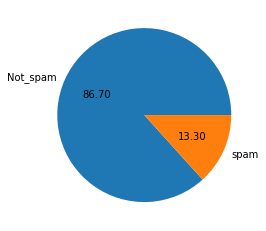

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['Not_spam','spam'],autopct="%0.2f")
plt.show()

In [28]:
# Data is imbalanced

In [29]:
import nltk
from nltk.corpus import stopwords

In [30]:
df['num_characters'] = df['Message'].apply(len)

In [31]:
df

,Message,Category,num_characters
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522
1,martin a posted tassos papadopoulos the greek ...,0,643
2,man threatens explosion in moscow thursday aug...,0,1509
3,klez the virus that won t die already the most...,0,1015
4,in adding cream to spaghetti carbonara which ...,0,771
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,160
5568,Will ü b going to esplanade fr home?,0,36
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


In [32]:
# num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df

,Message,Category,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,160,35,4
5568,Will ü b going to esplanade fr home?,0,36,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8029.000000,8029.000000,8029.000000
mean,500.192677,90.285839,1.610412
std,1281.019860,218.967633,1.183646
min,1.000000,0.000000,0.000000
25%,47.000000,12.000000,1.000000
50%,120.000000,26.000000,1.000000
75%,467.000000,83.000000,2.000000
max,22067.000000,3489.000000,28.000000


In [36]:
# ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6961.000000,6961.000000,6961.000000
mean,447.347077,81.582388,1.523057
std,1089.501227,184.003380,1.101889
min,2.000000,1.000000,1.000000
25%,42.000000,11.000000,1.000000
50%,93.000000,22.000000,1.000000
75%,428.000000,77.000000,2.000000
max,19820.000000,3043.000000,28.000000


In [37]:
#spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1068.000000,1068.000000,1068.000000
mean,844.629213,147.013109,2.179775
std,2113.528063,369.028952,1.498979
min,1.000000,0.000000,0.000000
25%,143.000000,27.000000,1.000000
50%,158.000000,33.000000,1.000000
75%,809.000000,128.250000,3.000000
max,22067.000000,3489.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

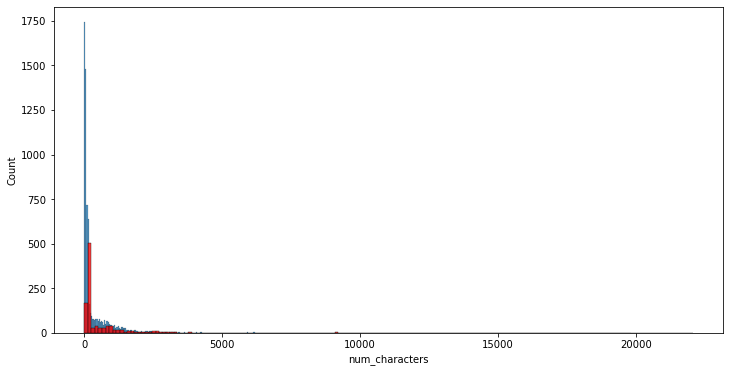

In [38]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

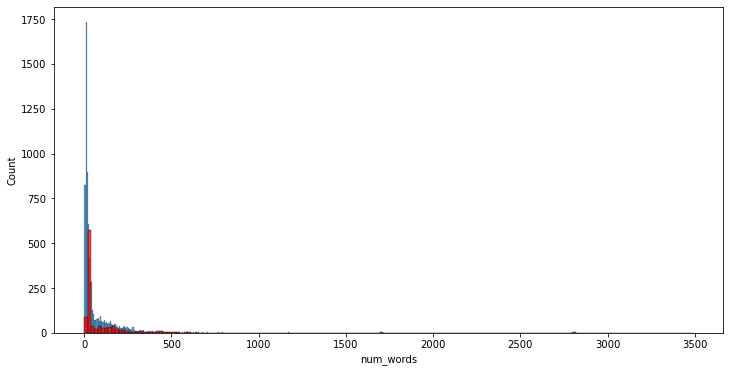

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'],color='red')

<AxesSubplot:>

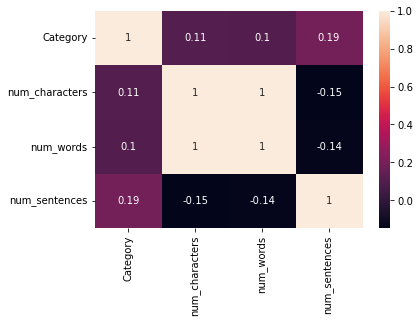

In [40]:
sns.heatmap(df.corr(),annot=True)

##  Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [41]:
import string

In [42]:
def transform_text(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Message = y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
# nltk.download('punkt')

In [45]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:
df['Message'][11]

11    yes great minds think alike but even withput e...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: Message, dtype: object

In [47]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [48]:
df.head()

,Message,Category,num_characters,num_words,num_sentences,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara effect pasta make...


In [49]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

91879

C:\Users\Suleman Zeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


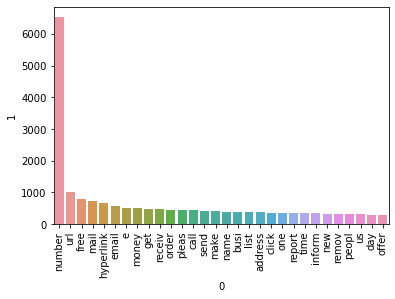

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['Message'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
# Text Vectorization
# using Bag of Words
df.head()

,Message,Category,num_characters,num_words,num_sentences,transformed_text
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,1509,256,1,man threaten explos moscow thursday august num...
3,klez the virus that won t die already the most...,0,1015,169,1,klez viru die alreadi prolif viru ever klez co...
4,in adding cream to spaghetti carbonara which ...,0,771,144,1,ad cream spaghetti carbonara effect pasta make...


##  Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
y = df['Category'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7575757575757576
[[1569  522]
 [  62  256]]
0.32904884318766064


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622249896222499
[[2086    5]
 [  86  232]]
0.9789029535864979


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9095060190950602
[[2014   77]
 [ 141  177]]
0.6968503937007874


In [64]:
from sklearn.model_selection import cross_validate, cross_val_score

In [65]:
# Perform 5-fold cross-validation to evaluate accuracy
accuracy_scores = cross_val_score(mnb, X_train, y_train, cv=5, scoring='accuracy')
# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", accuracy_scores.mean())
print("Standard deviation of accuracy:", accuracy_scores.std())
# Perform 5-fold cross-validation to evaluate both accuracy and precision
cv_results = cross_validate(
mnb,
X_train,
y_train,
cv=5,
scoring=['accuracy', 'precision_macro'], # Use 'precision_macro' for multiclass precision
return_train_score=True
)
# Print the cross-validation results
print("Test Accuracy for each fold:", cv_results['test_accuracy'])
print("Mean Test Accuracy:", cv_results['test_accuracy'].mean())
print("Test Precision for each fold:", cv_results['test_precision_macro'])
print("Mean Test Precision:", cv_results['test_precision_macro'].mean())
mnb.fit(X_train, y_train)

Accuracy scores for each fold: [0.94928826 0.95640569 0.96441281 0.95551601 0.95907473]
Mean accuracy: 0.9569395017793594
Standard deviation of accuracy: 0.004924680606084706
Test Accuracy for each fold: [0.94928826 0.95640569 0.96441281 0.95551601 0.95907473]
Mean Test Accuracy: 0.9569395017793594
Test Precision for each fold: [0.96752596 0.94875253 0.96871579 0.9668552  0.97318086]
Mean Test Precision: 0.9650060683233956


MultinomialNB()

## J48 model (random forest classifier)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=2)
rf_model.fit(X_train,y_train)
y_pred4 = rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9713574097135741
[[2086    5]
 [  64  254]]
0.9806949806949807


In [68]:
# Perform 5-fold cross-validation to evaluate accuracy
accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", accuracy_scores.mean())
print("Standard deviation of accuracy:", accuracy_scores.std())
# Perform 5-fold cross-validation to evaluate both accuracy and precision
cv_results = cross_validate(
rf_model,
X_train,
y_train,
cv=5,
scoring=['accuracy', 'precision_macro'], # Use 'precision_macro' for multiclass precision
return_train_score=True
)
# Print the cross-validation results
print("Test Accuracy for each fold:", cv_results['test_accuracy'])
print("Mean Test Accuracy:", cv_results['test_accuracy'].mean())
print("Test Precision for each fold:", cv_results['test_precision_macro'])
print("Mean Test Precision:", cv_results['test_precision_macro'].mean())
rf_model.fit(X_train, y_train)

Accuracy scores for each fold: [0.97330961 0.97775801 0.97686833 0.96886121 0.97153025]
Mean accuracy: 0.9736654804270464
Standard deviation of accuracy: 0.003309799864366252
Test Accuracy for each fold: [0.97330961 0.97775801 0.97686833 0.96886121 0.97153025]
Mean Test Accuracy: 0.9736654804270464
Test Precision for each fold: [0.98505976 0.98748749 0.97689212 0.97517873 0.97340323]
Mean Test Precision: 0.9796042648840719


RandomForestClassifier(n_estimators=50, random_state=2)

In [69]:
y_pred5 = rf_model.predict(X_test)

In [70]:
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9713574097135741
[[2086    5]
 [  64  254]]
0.9806949806949807


In [72]:
# Save the model to a pickle file
import pickle
pickle.dump(tfidf, open('Vectorizer.pkl', 'wb'))
pickle.dump(rf_model, open('j48_model.pkl', 'wb'))

# Applying Other Models

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9734329597343296, 0.950354609929078)

In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9734329597343296
Precision -  0.950354609929078
For  KN
Accuracy -  0.912826899128269
Precision -  0.990909090909091
For  NB
Accuracy -  0.9622249896222499
Precision -  0.9789029535864979
For  DT
Accuracy -  0.933582399335824
Precision -  0.895
For  LR
Accuracy -  0.958904109589041
Precision -  0.9581589958158996
For  RF
Accuracy -  0.9713574097135741
Precision -  0.9806949806949807
For  AdaBoost
Accuracy -  0.9564134495641345
Precision -  0.9080459770114943
For  BgC
Accuracy -  0.9576587795765878
Precision -  0.8857142857142857
For  ETC
Accuracy -  0.9721876297218763
Precision -  0.966542750929368
For  GBDT
Accuracy -  0.9414694894146949
Precision -  0.9538461538461539


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912827,0.990909
5,RF,0.971357,0.980695
2,NB,0.962225,0.978903
8,ETC,0.972188,0.966543
4,LR,0.958904,0.958159
9,GBDT,0.941469,0.953846
0,SVC,0.973433,0.950355
6,AdaBoost,0.956413,0.908046
3,DT,0.933582,0.895000
7,BgC,0.957659,0.885714


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [82]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912827
1,RF,Accuracy,0.971357
2,NB,Accuracy,0.962225
3,ETC,Accuracy,0.972188
4,LR,Accuracy,0.958904
5,GBDT,Accuracy,0.941469
6,SVC,Accuracy,0.973433
7,AdaBoost,Accuracy,0.956413
8,DT,Accuracy,0.933582
9,BgC,Accuracy,0.957659


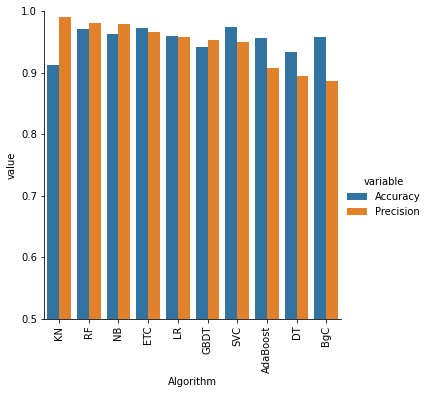

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [87]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [88]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [90]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912827,0.990909,0.912827,0.990909,0.912827,0.990909,0.912827,0.990909
1,RF,0.971357,0.980695,0.971357,0.980695,0.971357,0.980695,0.971357,0.980695
2,NB,0.962225,0.978903,0.962225,0.978903,0.962225,0.978903,0.962225,0.978903
3,ETC,0.972188,0.966543,0.972188,0.966543,0.972188,0.966543,0.972188,0.966543
4,LR,0.958904,0.958159,0.958904,0.958159,0.958904,0.958159,0.958904,0.958159
5,GBDT,0.941469,0.953846,0.941469,0.953846,0.941469,0.953846,0.941469,0.953846
6,SVC,0.973433,0.950355,0.973433,0.950355,0.973433,0.950355,0.973433,0.950355
7,AdaBoost,0.956413,0.908046,0.956413,0.908046,0.956413,0.908046,0.956413,0.908046
8,DT,0.933582,0.895000,0.933582,0.895000,0.933582,0.895000,0.933582,0.895000
9,BgC,0.957659,0.885714,0.957659,0.885714,0.957659,0.885714,0.957659,0.885714
